<a href="https://colab.research.google.com/github/Riipou/First-order/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [330]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

# Chargement et pré-traitement des données

In [331]:
def one_hot_encoding(y):
    new_y = []
    for label in y:
        label_vector = np.zeros(20)
        label_vector[label - 1] = 1
        new_y.append(label_vector)
    y = np.array(new_y)
    return y

def shuffle(X, y):
    index = np.arange(np.shape(X)[1])
    np.random.shuffle(index)
    X = X[:, index]
    y = y[index, :]
    return X, y

def split_data(X, y, split_value=0.85):
    m = X.shape[1]
    m = int(m * split_value)
    X_train = X[:, :m]
    y_train = y[:, :m]
    X_test = X[:, m:]
    y_test = y[:, m:]
    return X_train, y_train, X_test, y_test

In [332]:
# Charger le fichier .mat
nom_fichier_mat = 'data_doc.mat'
donnees = loadmat(nom_fichier_mat)

# Xts combien de fois le mot dans le texte
if 'Xts' in donnees:
    Xts = donnees['Xts']
else:
    print("La variable 'Xts' n'a pas été trouvée dans le fichier.")

# id texte avec classe
if 'yts' in donnees:
    yts = donnees['yts']
else:
    print("La variable 'yts' n'a pas été trouvée dans le fichier.")

# Xvr combien de fois le mot dans le texte
if 'Xvr' in donnees:
    Xvr = donnees['Xvr']
else:
    print("La variable 'Xvr' n'a pas été trouvée dans le fichier.")

yts = one_hot_encoding(yts)
Xts, yts = shuffle(Xts, yts)
X_train, y_train, X_test, y_test = split_data(Xts, yts.T)

# Variables

In [333]:
num_iterations=1600
learning_rate=0.1
a = 0.05

#Descente du gradient

In [334]:
def loss_function(y, y_pred):
    n = y.shape[1]
    loss = (np.linalg.norm(y - y_pred, 'fro') ** 2) / n
    return loss

def relu(x, a):
    return np.maximum(0, a * x)


def sigmoid(x, a):
    return 1 / (1 + np.exp(-a * x))

def sigmoid_derivative(x, a):
    return a * sigmoid(x, a) * (1 - sigmoid(x, a))

def update_W1(X, Y, W1, b1, learning_rate, a):
    n = Y.shape[1]

    sigmoid_derivative_term = sigmoid_derivative(W1.T @ X + b1, a)

    gradient = X @ ((1/n) * (sigmoid(W1.T @ X + b1, a) - Y) * sigmoid_derivative_term).T

    update = learning_rate * gradient

    return update

def update_b1(X, Y, W1, b1, learning_rate, a):
    n = Y.shape[1]
    ones_vector = np.ones((1, n))
    sigmoid_derivative_term = sigmoid_derivative(W1.T @ X + b1, a)

    gradient = (1/n) * np.sum((sigmoid(W1.T @ X + b1, a) - Y) * sigmoid_derivative_term * ones_vector, axis=1, keepdims=True)
    update = learning_rate * gradient

    return update

def block_coordinate_descent(X, Y, W1, b1, num_iterations, learning_rate, a):
    train_losses = []  # Pour stocker les pertes d'entraînement à chaque itération
    accuracies = []  # Pour stocker les accuracies à chaque itération

    for k in range(num_iterations):
        # Optimize W1 while fixing b1
        W1 -= update_W1(X, Y, W1, b1, learning_rate, a)

        # Optimize b1 while fixing W1
        b1 -= update_b1(X, Y, W1, b1, learning_rate, a)

        # Calculate and print the loss for monitoring every 10 iterations
        if (k + 1) % 10 == 0:
            Y_pred = sigmoid(W1.T @ X + b1, a)
            loss = loss_function(Y, Y_pred)
            accuracy = np.mean(np.round(Y_pred) == Y)
            train_losses.append(loss)
            accuracies.append(accuracy)
            print(f"Iteration {k+1}, Loss: {loss}, Accuracy: {accuracy * 100}%")

    return W1, b1, train_losses, accuracies

In [335]:
# Initialisation des poids
b1_initial = np.random.randn(20, 1)

# Avec une distribution normal
# W1_initial = np.random.randn(20, X_train.shape[0])

# Avec l'initialisation Xavier/Glorot
W1_initial = np.random.randn(20, X_train.shape[0]) * np.sqrt(2.0 / (X_train.shape[0] + 20))

W1_initial = W1_initial.T

W1_optimized, b1_optimized, train_losses, accuracies = block_coordinate_descent(X_train, y_train, W1_initial, b1_initial, num_iterations, learning_rate, a)

# Now nous W1_optimized and b1_optimized

Iteration 10, Loss: 5.0958942402804945, Accuracy: 37.61208494859262%
Iteration 20, Loss: 5.087347369151443, Accuracy: 38.412691724254174%
Iteration 30, Loss: 5.078856302557048, Accuracy: 39.29420192145626%
Iteration 40, Loss: 5.070421558253791, Accuracy: 40.264621607955505%
Iteration 50, Loss: 5.062043501930838, Accuracy: 41.307517276251474%
Iteration 60, Loss: 5.053722353874949, Accuracy: 42.38496544749705%
Iteration 70, Loss: 5.045458196865702, Accuracy: 43.4767402663071%
Iteration 80, Loss: 5.03725098503354, Accuracy: 44.49266812742289%
Iteration 90, Loss: 5.029100553419934, Accuracy: 45.555368279116806%
Iteration 100, Loss: 5.021006627993766, Accuracy: 46.6189111747851%
Iteration 110, Loss: 5.012968835899093, Accuracy: 47.599443788976906%
Iteration 120, Loss: 5.004986715734599, Accuracy: 48.57323445137367%
Iteration 130, Loss: 4.997059727692818, Accuracy: 49.58536996460475%
Iteration 140, Loss: 4.9891872634154755, Accuracy: 50.51828754424405%
Iteration 150, Loss: 4.981368655449545,

# Evaluation des données

In [336]:
def evaluation(W, B, X_test, y_test) :
  Y_test_pred = sigmoid(W.T @ X_test + b1_optimized, a)
  test_loss = loss_function(y_test, Y_test_pred)
  test_accuracy = np.mean(np.round(Y_test_pred) == y_test)
  print(f"\nFinal Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100}%")

  # Plot the training loss
  plt.plot(range(10, num_iterations + 1, 10), train_losses, label='Training Loss')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Training Loss over Iterations')
  plt.legend()
  plt.show()

  # Plot the training accuracy
  plt.plot(range(10, num_iterations + 1, 10), accuracies, label='Training Accuracy')
  plt.xlabel('Iteration')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy over Iterations')
  plt.legend()
  plt.show()


Final Test Loss: 4.1790593861442025, Test Accuracy: 91.3658070678128%


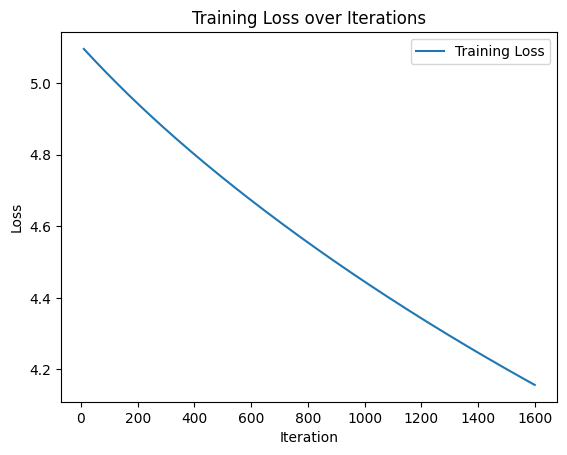

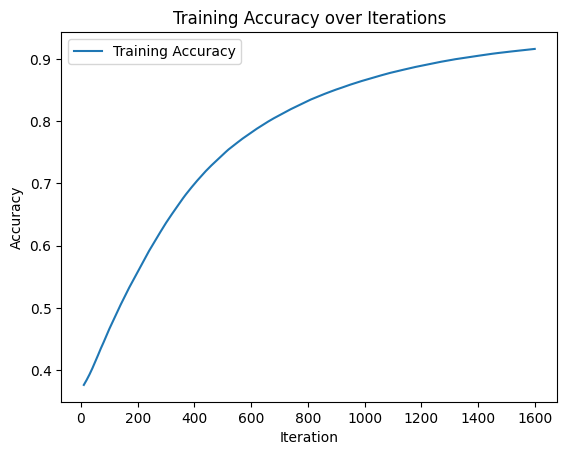

In [337]:
evaluation(W1_optimized, b1_optimized, X_test, y_test)

# Création validation

In [338]:
def pred_to_onehot(y_pred):
    temp = []
    for row in y_pred.T: #on boucle  travers les colonnes de y_pred
        temp_row = np.zeros(y_pred.shape[0]) #vecteur de 20 zeros
        for i in range(y_pred.shape[0]):
            if row[i] == max(row):
                temp_row[i] = 1
                break
        temp.append(temp_row)

    return np.array(temp, dtype=np.float64).T

In [339]:
x_valid = Xvr[:,:]
y_valid = pred_to_onehot(sigmoid(W1_optimized.T @ x_valid + b1_optimized, a)).T
prediction = []
for i in range(y_valid.shape[0]):
    predicted_class = list(y_valid[i]).index(1)
    # predicted_class = np.where(y_valid[i] == 1)
    prediction.append(str(i+1) + "," + str(((predicted_class+1)*100)+1))
    # print(prediction)
with open("validation_prediction.csv", "w") as pred_file:
    pred_file.write("id,class\n")
    for y_pred in prediction:
        pred_file.write(y_pred+"\n")
